# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


In [ ]:
id1 = "315794057"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [3]:
df = pd.DataFrame([id1])

Uncomment in case two students are doing the assignment together:

In [4]:
#df = pd.DataFrame([id1,id2])

In [5]:
df.to_clipboard(index=False,header=False)

---

----

In [6]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/avocado.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
total_sold      float64
small_sold      float64
large_sold      float64
sma             float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
total_sold      0
small_sold      0
large_sold      0
sma             0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Q1 

In [9]:
pd.pivot_table(data,index=['year','region'],values=['total_sold'],aggfunc=np.sum).sort_values('year',ascending = True)

total_sold
year region                          
2015 Albany              4.029896e+06
     Northeast           2.033790e+08
     NorthernNewEngland  2.009463e+07
     Orlando             1.471958e+07
     Philadelphia        2.089222e+07
...                               ...
2018 LasVegas            4.493632e+06
     LosAngeles          3.805238e+07
     Louisville          1.471561e+06
     DallasFtWorth       1.817175e+07
     WestTexNewMexico    1.180082e+07

[216 rows x 1 columns]

# Q2
### in my new dataframe there is 312 rows

In [10]:
region_starts_with_L = data[data['region'].str.startswith('L')]
L_region_2016 = region_starts_with_L[region_starts_with_L['year']==2016]
L_region_2016

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
3900,0,25/12/2016,0.82,292038.68,107317.80,43301.69,7606.75,133812.44,54017.79,79794.65,0.00,conventional,2016,LasVegas
3901,1,18/12/2016,0.81,297506.24,88443.43,49295.62,7072.79,152694.40,58263.70,94430.70,0.00,conventional,2016,LasVegas
3902,2,11/12/2016,0.83,339328.92,83682.89,55352.63,6832.20,193461.20,68316.82,125144.38,0.00,conventional,2016,LasVegas
3903,3,04/12/2016,0.91,315048.80,93963.93,56502.76,5327.06,159255.05,49383.72,109472.72,398.61,conventional,2016,LasVegas
3904,4,27/11/2016,0.86,255656.46,104641.27,41992.71,4857.37,104165.11,44172.65,59992.46,0.00,conventional,2016,LasVegas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13176,47,31/01/2016,1.55,1293.69,6.12,781.54,0.00,506.03,186.67,319.36,0.00,organic,2016,Louisville
13177,48,24/01/2016,1.49,1929.38,24.57,1229.56,0.00,675.25,216.67,458.58,0.00,organic,2016,Louisville
13178,49,17/01/2016,1.85,1241.24,67.79,1037.86,0.00,135.59,0.00,135.59,0.00,organic,2016,Louisville
13179,50,10/01/2016,1.68,1460.66,44.55,1039.39,0.00,376.72,0.00,376.72,0.00,organic,2016,Louisville


# Q3
### sales mean: 593351.43

In [11]:
L_region_2016['total_sold'].mean()

593351.4267948718

# Q4
### total bags sold in september 2016 in all regions starts with L: 3735717.63

In [12]:
L_region_2016_c=L_region_2016.copy(deep=False)
L_region_2016_c['Date'] = pd.to_datetime(L_region_2016_c.Date)
L_region_2016_c['month'] = pd.DatetimeIndex(L_region_2016_c.Date).month
L_region_2016_c_9=L_region_2016_c[L_region_2016_c['month']==9]
L_region_2016_c_9.groupby('month')[['Total Bags']].sum()

,Total Bags
month,
9,3735717.63


# Q5

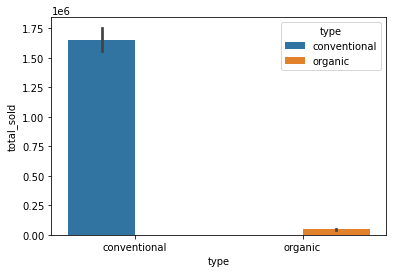

In [13]:
 sns.barplot(x='type', y="total_sold", hue='type', data=data)

# Q6

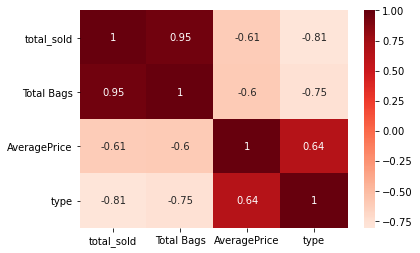

In [14]:
features = ['total_sold', 'Total Bags', 'AveragePrice', 'type']
data['type'] = data['type'].astype('category').cat.codes
corrs = data[features].corr(method = 'spearman')
sns.heatmap(corrs, cmap='Reds', center=0, annot = True);

# Q7

In [15]:
corrs = corrs.replace(1,0)
corrs.max()

total_sold      0.952550
Total Bags      0.952550
AveragePrice    0.643803
type            0.643803
dtype: float64

Text(0.5, 1.0, 'scatterplot of highist corrlation')

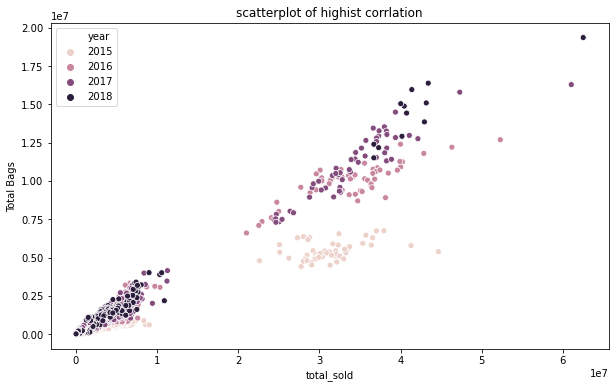

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_sold', y='Total Bags', data=data, hue='year')
plt.title("scatterplot of highist corrlation")

---
# GOOD LUCK !!!!
---

In [17]:
# do not type below this line